<a href="https://colab.research.google.com/github/alphaTdeeraj/My-Tasks-App/blob/master/HousePricePredictionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Housing price prediction of Boston(kaggle)

####_Cath me on_

1.  [GitHub](https://www.github.com/alphaTdeeraj)
2.  [LinkedIn](https://www.linkedin.com/in/deeraj-deeraj-259b80176/)
3.  [Medium](https://medium.com/@deerajn04)



##Code

###Exploratory Data analysis

In [0]:
%matplotlib inline 


#data manipulation libraries 
import pandas as pd 
import numpy as np 

#visusalisation library
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno


#preprocessing libraries 
from sklearn import preprocessing


In [2]:
#any meta settings are done here 
pd.set_option('display.max_columns', 30)
plt.style.use('ggplot')
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [0]:
#data io
path = './HousingData.csv'
columns = ['CRIM', 'ZN', ' INDUS', 'CHAS', ' NOX', 'RM', ' AGE', ' DIS', 'RAD', ' TAX', 'PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(path)

In [4]:
print('there are {}, sample points in the data '.format(df.shape[0]))
print()
print(df.head())#shows the first 5 sample points 

there are 506, sample points in the data 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


####Feature desription of the data 


  1.   CRIM => per capita crime rate by town

  2.    ZN    =>  proportion of residential land zoned for lots over 25,000 sq.ft.

  3.  INDUS=>proportion of non-retail business acres per town

  4.   CHAS   => Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  5.   NOX =>nitric oxides concentration (parts per 10 million

  6.   RM    =>  proportion of owner-occupied units built prior to 1940

  7.  AGE =>weighted distances to five Boston employment centres

  8.   DIS    => index of accessibility to radial highways

  9.   RAD =>  full-value property-tax rate per $10,000

  10. TAX    => pupil-teacher ratio by town

  11. PTRATIO =>pupil-teacher ratio by town

  12. B => 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

  13.  LSTAT =>% lower status of the population

  14.   MEDV    => Median value of owner-occupied homes in $1000s



In [5]:
#lets see the features of our data 
#descriptio of a feature is give in above markdown
print('There are {} unique features for a sample'.format(df.shape[1]))
print()
print(list(df.columns))

There are 14 unique features for a sample

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

####look at missing values in our data

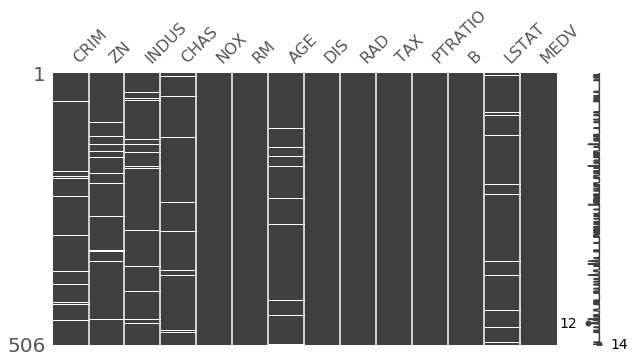

In [7]:
missingno.matrix(df ,figsize=(10,5))

####Feature : CRIM(crime rate percaptia)
#####There are 20 missing values
#####can we infer the missing values with 

In [8]:
#number of missing values are 
print(df['CRIM'].isnull().sum())


20


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


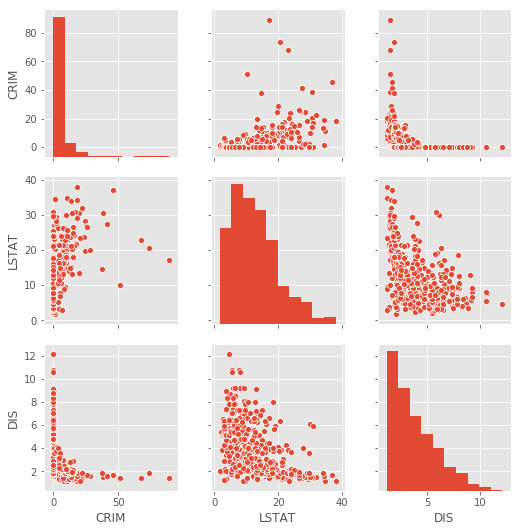

In [9]:
sns.pairplot(df, vars=['CRIM', 'LSTAT', 'DIS'])

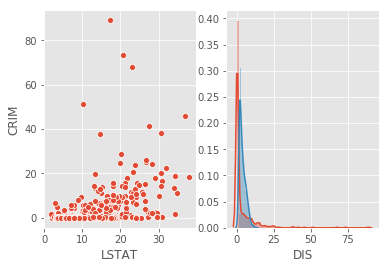

In [10]:
plt.subplot(1,2,1)
sns.scatterplot(x=df['LSTAT'], y=df['CRIM'])
plt.subplot(1,2,2)
sns.distplot(df['CRIM'].dropna())
sns.distplot(df['DIS'].dropna())

0.253715


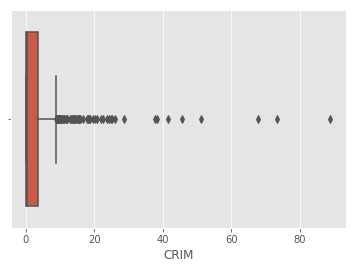

In [11]:
print(df['CRIM'].median())
sns.boxplot(df['CRIM'])

In [0]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].median())

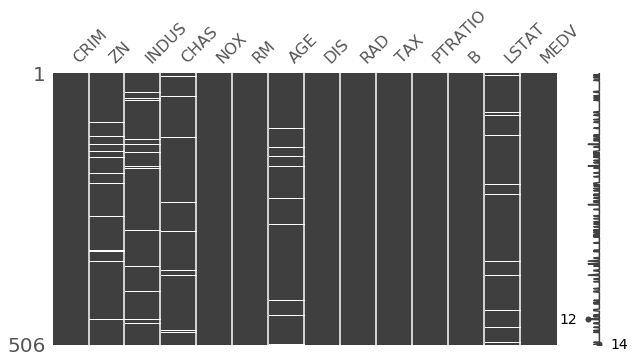

In [13]:
missingno.matrix(df,figsize=(10,5))

####Feature : ZN (amount of  zinc oxide's ppm)

In [14]:
zn = df['ZN']
print('there are {} many null values in ZN feature'.format(zn.isnull().sum()))
print("zn's median is {}".format(df['ZN'].median()))
print("zn's mean is {}".format(zn.mean()))

there are 20 many null values in ZN feature
zn's median is 0.0
zn's mean is 11.2119341563786


#####Plots of ZN feature 

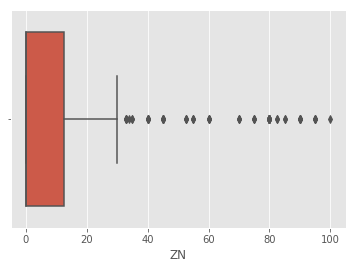

In [15]:
sns.boxplot(zn.dropna())

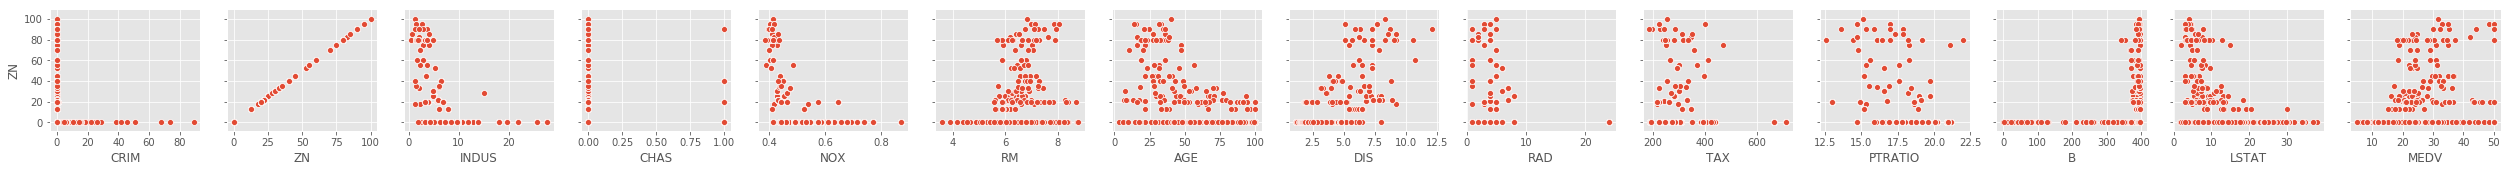

In [16]:
sns.pairplot(df , x_vars =list(df.columns), y_vars=['ZN'])

#####we can fill nan of ZN with most probable value , that is zero because most of the data is zero 

In [0]:
df2 = pd.DataFrame()

In [0]:
df2['CRIM'] = df['CRIM']
df2['ZN']  = df['ZN'].fillna(zn.median())

In [19]:
df2.head()

,CRIM,ZN
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0
3,0.03237,0.0
4,0.06905,0.0


In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### Feature : INDUS : Propotion  of non-retail buisness

In [21]:
indus = df['INDUS']
print('there are {} missing values in INDUS column'.format(indus.isnull().sum()))
print('the median of this feature is {}'.format(indus.median()))
print('the mean of this feature is {}'.format(indus.mean()))

there are 20 missing values in INDUS column
the median of this feature is 9.69
the mean of this feature is 11.083991769547332


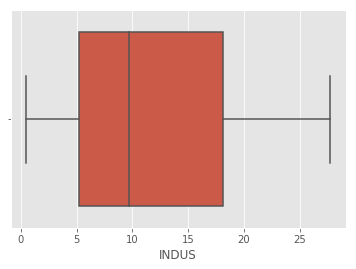

In [22]:
sns.boxplot(indus)

#####mean and median are almost same .

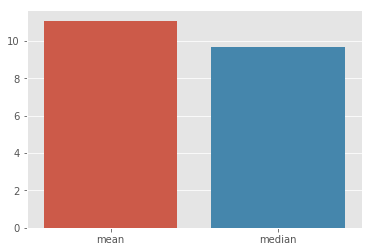

In [23]:
sns.barplot(x=['mean','median'], y=[indus.mean(), indus.median()])

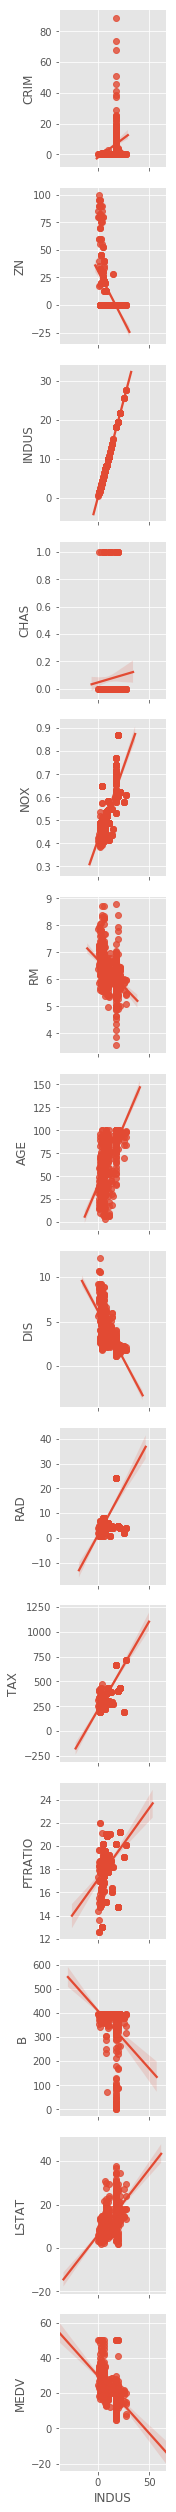

In [24]:
sns.pairplot(df,y_vars=df.columns,  x_vars=['INDUS'],diag_kind='kde',kind='reg')

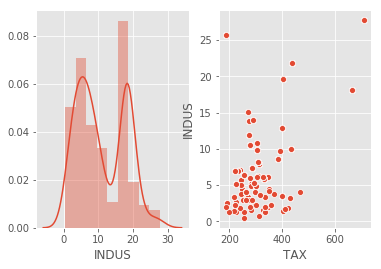

In [25]:
#let's see the distribution of the INDUS column 
plt.subplot(121)
sns.distplot(indus.dropna())
plt.subplot(122)
sns.scatterplot(x=df['TAX'].dropna() , y=indus.dropna())


In [26]:
df['inverse_check'] =((1/df['TAX'])-0.00106)*1000
df[['inverse_check', 'TAX', 'INDUS']]

,inverse_check,TAX,INDUS
0,2.318378,296,2.31
1,3.072231,242,7.07
2,3.072231,242,7.07
3,3.444505,222,2.18
4,3.444505,222,2.18
5,3.444505,222,2.18
6,2.155434,311,7.87
7,2.155434,311,7.87
8,2.155434,311,7.87
9,2.155434,311,7.87


#####we can see the negative corelation between tax and indus

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


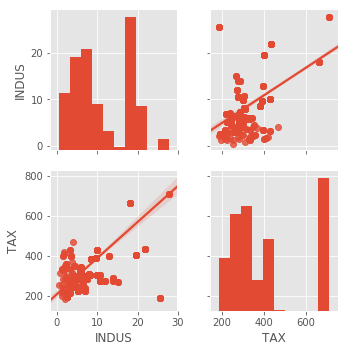

In [27]:
sns.pairplot(df, x_vars=['INDUS', 'TAX'], y_vars=['INDUS', 'TAX'], kind='reg')

In [0]:
import math
indus_dict = {}
a = df[['INDUS','TAX']].values
for i in a:
  if i[0] not in indus_dict:
    if not(math.isnan(i[0])):
      indus_dict[i[0]] = i[0]

In [29]:
df['INDUS'].mean()

11.083991769547332

In [30]:
for key in indus_dict.keys():
  print(key)

2.31
7.07
2.18
7.87
8.14
5.96
2.95
6.91
5.64
4.0
1.22
0.74
1.32
5.13
1.38
3.37
6.07
10.81
12.83
4.86
4.49
3.41
15.04
2.89
8.56
10.01
25.65
21.89
19.58
4.05
2.46
3.44
2.93
0.46
1.52
1.47
2.03
2.68
10.59
13.89
6.2
4.93
5.86
3.64
3.75
3.97
6.96
6.41
3.33
1.21
2.97
2.25
1.76
5.32
4.95
13.92
2.24
6.09
9.9
7.38
3.24
6.06
5.19
1.89
3.78
4.39
4.15
2.01
1.25
1.69
2.02
1.91
18.1
27.74
9.69
11.93


In [0]:
def add_indus(col1,value_dict , mean=11.083991769547332):
  for index , value in enumerate(col1):
    if (math.isnan(value)):
      if value in value_dict:
        col1[index] = value_dict[value]
      else:
        col1[index] = mean
  return col1
  

In [0]:
df2['INDUS'] = add_indus(df['INDUS'].tolist(), indus_dict)

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,inverse_check
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,2.318378
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072231
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.072231
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.444505
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,3.444505


####Feature : CHAS(wheter the tract bound river Charles)(the feature is boolean)

there are 452 0 values and 34 1  values and 20 missing values


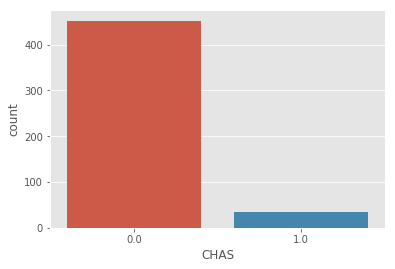

In [34]:
df['CHAS'].isnull().sum()
sns.countplot(df['CHAS'])
print('there are {} 0 values and {} 1  values and {} missing values'.format(df['CHAS'].tolist().count(0),
                                                          df['CHAS'].tolist().count(1),
                                                          df['CHAS'].isnull().sum()))
#there are l

#####Most of the tows tract does not bound the river Charles

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


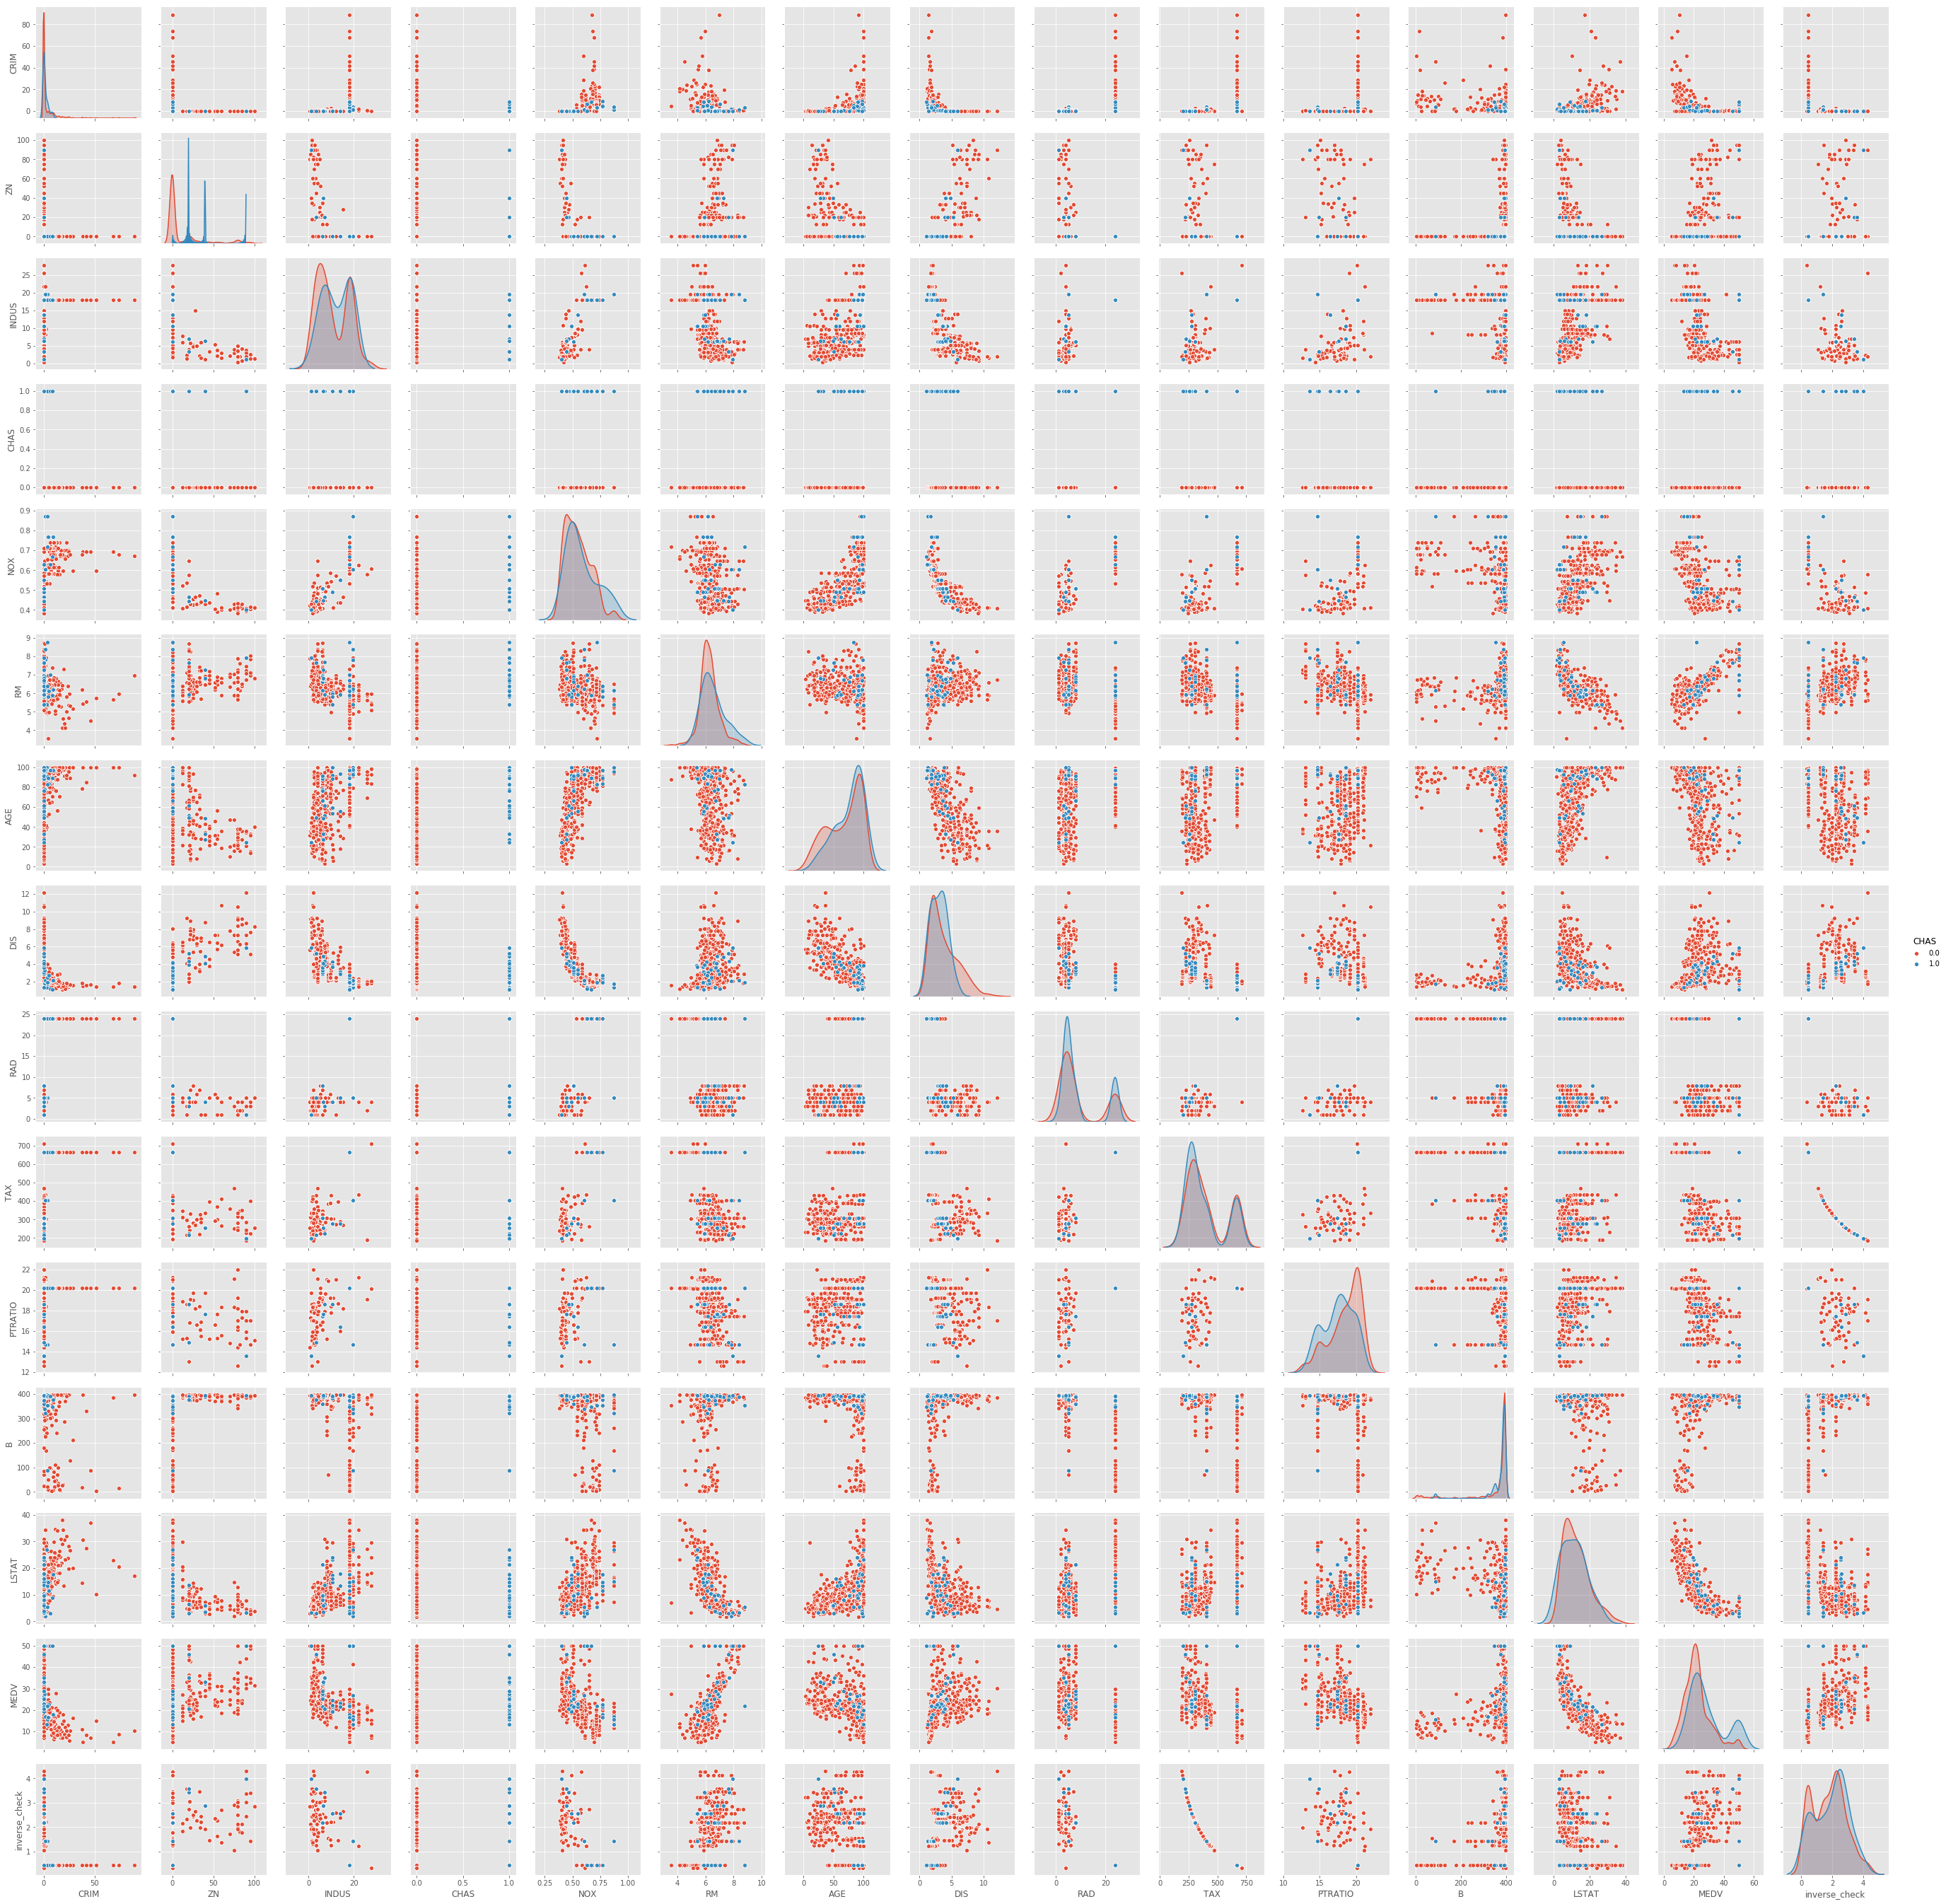

In [35]:
sns.pairplot(df, hue='CHAS')

In [0]:
df2['CHAS'] = df['CHAS'].fillna(0)

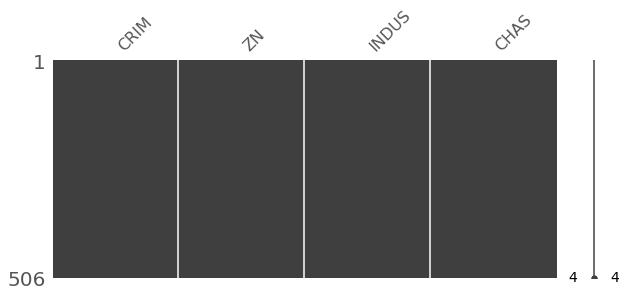

In [37]:
missingno.matrix(df2,figsize=(10,4))

#### Feature : NOX (amount of nitrix oxide ppm)

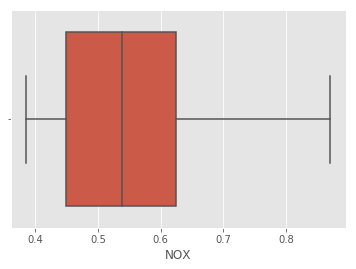

In [38]:
df['NOX'].isnull().sum()#hurray there are no missing values 
sns.boxplot(df['NOX'])

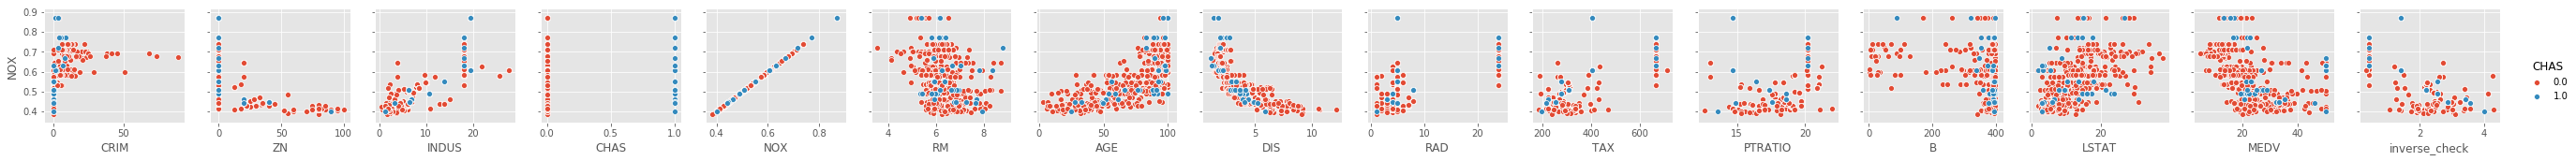

In [39]:
sns.pairplot(df ,x_vars=df.columns, y_vars=['NOX'], hue='CHAS')

In [0]:
df2['NOX'] = df['NOX']

#####there is some relation between zonned area and nox percentage {zonned area has less nox percentage}

####Feature : RM(percentage of owner occupied house ,which is build prior to 1940)

there are 0 missing values


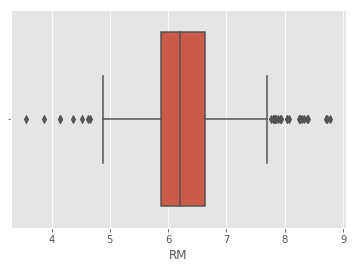

In [41]:
print('there are {} missing values'.format(df['RM'].isnull().sum()))
sns.boxplot(df['RM'])

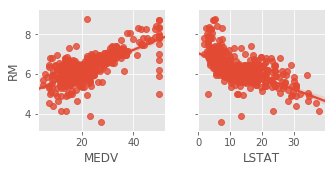

In [42]:
sns.pairplot(df, x_vars=['MEDV', 'LSTAT'], y_vars=['RM'],kind='reg')

#####Infernce is crime rate is less when owner occupied percentage is more
##### there is positive corelation between RM and MEDV 
#####there is  negative corelation between RM and LSTAT

####Feature : AGE(self explanatory)

there are 20 missing values in age 


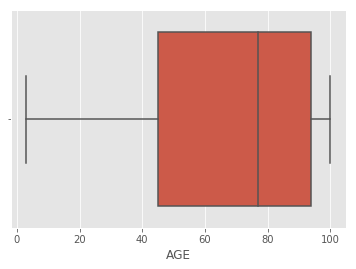

In [43]:
print('there are {} missing values in age '.format(df['AGE'].isnull().sum()))
sns.boxplot(df['AGE'])


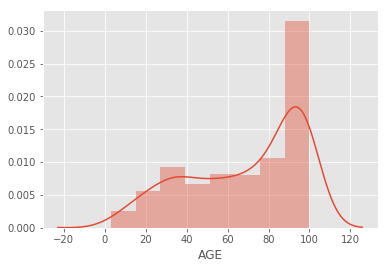

In [44]:
sns.distplot(df['AGE'].dropna())

In [45]:
print('mean is {}'.format(df['AGE'].mean()))
print('median is {}'.format(df['AGE'].median()))
print('mode is {}'.format(df['AGE'].mode()))

mean is 68.51851851851852
median is 76.80000000000001
mode is 0    100.0
dtype: float64


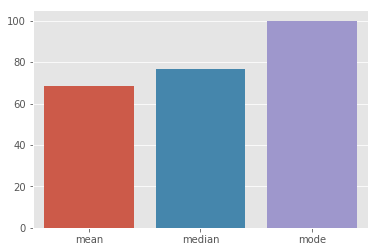

In [46]:
sns.barplot(x=['mean', 'median', 'mode'], y=[df['AGE'].mean(), df['AGE'].median(), df['AGE'].mode()])

In [0]:
df2['AGE'] = df['AGE'].fillna(df['AGE'].mean())

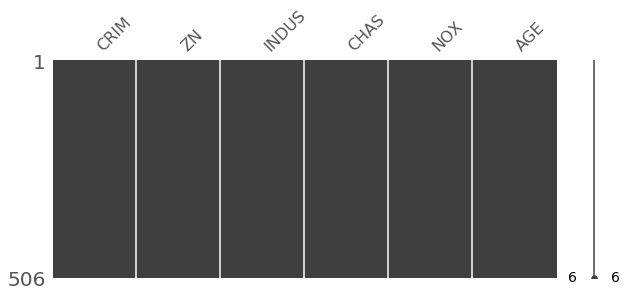

In [48]:
missingno.matrix(df2,figsize=(10,4))

In [49]:
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,inverse_check
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,2.318378
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072231
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.072231
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.444505


####Feature: DIS(It is the index which about the avalaibility of radial highway)

there are 0 missing values 
mean of this feature is 3.795042687747034
median of the feature is 3.2074499999999997


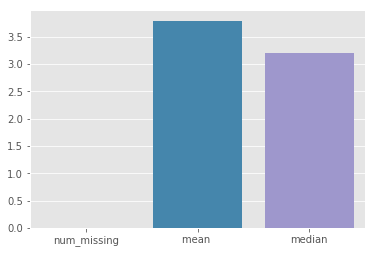

In [52]:
DIS = df['DIS']
print('there are {} missing values '.format(DIS.isnull().sum()))
print('mean of this feature is {}'.format(DIS.mean()))
print('median of the feature is {}'.format(DIS.median()))

sns.barplot(x=['num_missing', 'mean ', 'median'],
           y=[DIS.isnull().sum(), DIS.mean(), DIS.median()])


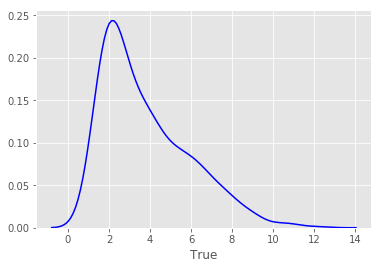

In [57]:
sns.distplot(DIS, axlabel=True,color='b', hist=False)

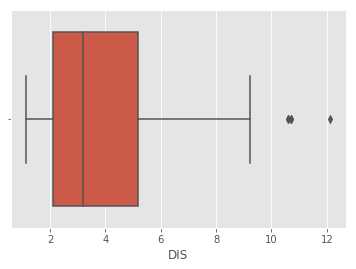

In [58]:
sns.boxplot(DIS)

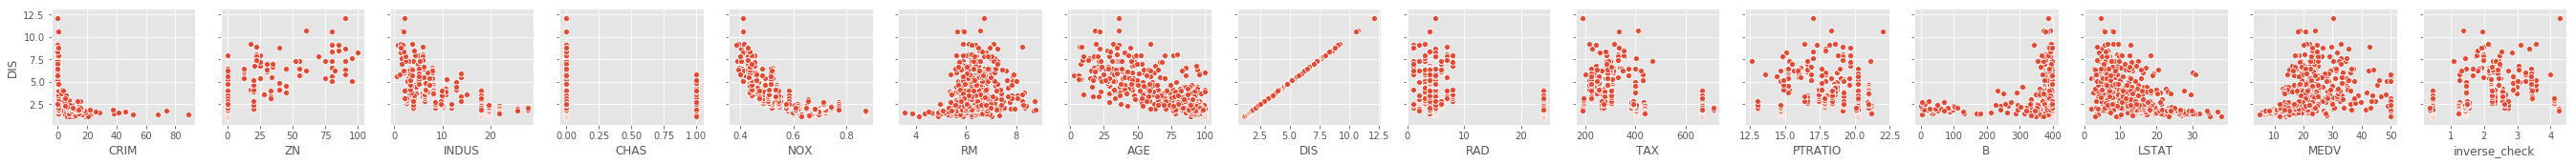

In [59]:
#seems like some outliers are driving the mean towards right 
sns.pairplot(df , x_vars=df.columns, y_vars=['DIS'])

#####seems like there is no corelation between DIS and other variables 

In [60]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,inverse_check
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0,2.318378
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,3.072231


####Feature RAD (full value property tax)

there are 0 missing values
Mean of this feature is 9.549407114624506
Median of this feature is 5.0


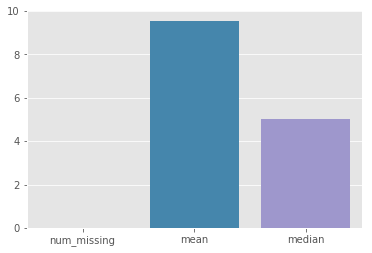

In [63]:
#i'm assuming there will be a positive corelation between RAD and TAX
RAD = df['RAD']
print('there are {} missing values'.format(RAD.isnull().sum()))
print('Mean of this feature is {}'.format(RAD.mean()))
print('Median of this feature is {}'.format(RAD.median()))
sns.barplot(x=['num_missing','mean','median'], y=[RAD.isnull().sum(), RAD.mean(), RAD.median()])

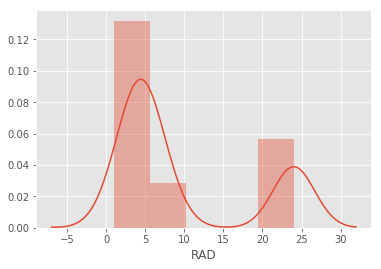

In [64]:
#seeing the graph we can infer that either the graph has high standard deviation or it has outliers toward right 
sns.distplot(RAD)

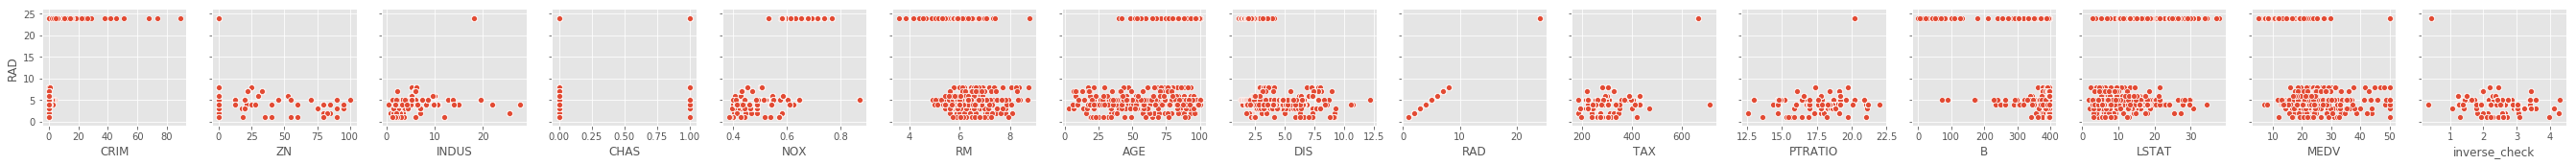

In [68]:
sns.pairplot(df , x_vars=df.columns, y_vars=['RAD'])

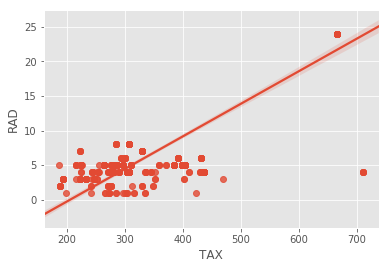

In [69]:
sns.regplot(x=df['TAX'], y=RAD)

In [0]:
df2['RAD'] = df['RAD']

#####There is some positive corelation between the TAX and RAD 

####Feature : TAX()

Number of missing values are 0
Mean of this feature is 408.2371541501976
Median of this feature is 330.0


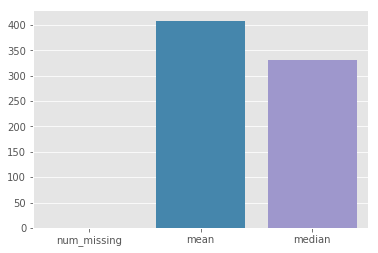

In [70]:
TAX = df['TAX']
print('Number of missing values are {}'.format(TAX.isnull().sum()))
print('Mean of this feature is {}'.format(TAX.mean()))
print('Median of this feature is {}'.format(TAX.median()))
sns.barplot(x=['num_missing', 'mean', 'median'],
           y=[TAX.isnull().sum(), TAX.mean(), TAX.median()])

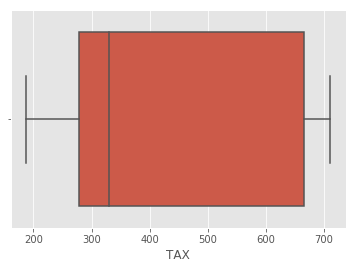

In [71]:
#no missing values and mean and median are almost the same [some outliers are there towards right]
sns.boxplot(TAX)

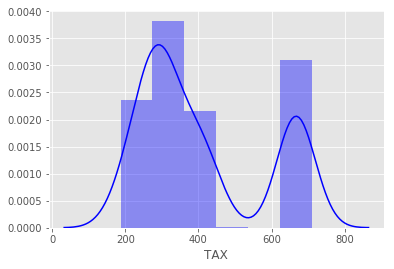

In [72]:
sns.distplot(TAX, color='b')

#####There are two gaussian distribution in this feature

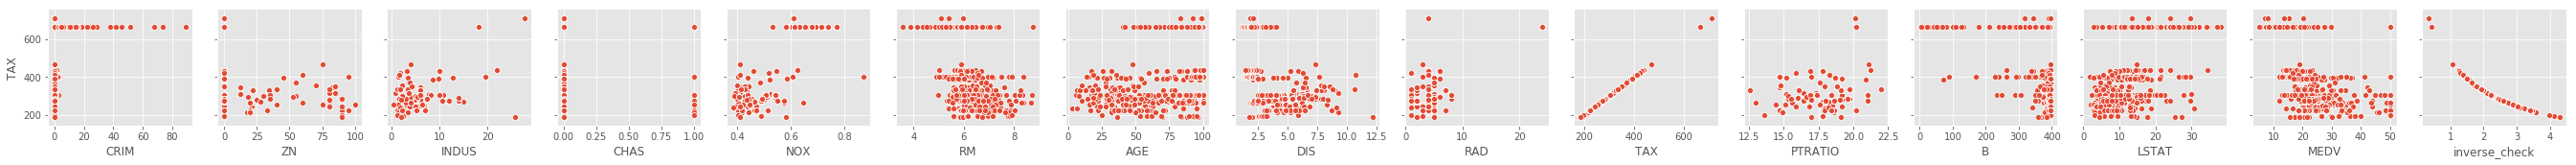

In [73]:
sns.pairplot(df, x_vars=df.columns, y_vars=['TAX'])

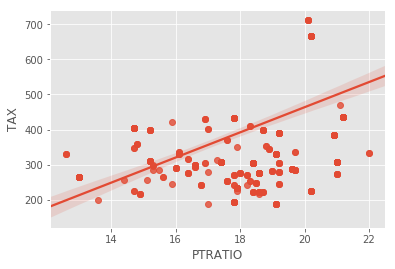

In [77]:
#let's see some graph between PTRATIO AND TAX
sns.regplot(df['PTRATIO'], TAX)

In [0]:
df2['TAX'] = df['TAX']

####Feature : (PTRATIO): (Ratio which tells us what is the percentage of pupil teacher in that town)

number of missing values in it are 0
Mean of the feature is 18.455533596837967
Median of the feature is 19.05


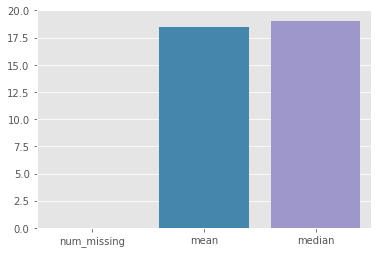

In [80]:
PT  = df['PTRATIO']
print('number of missing values in it are {}'.format(PT.isnull().sum()))
print('Mean of the feature is {}'.format(PT.mean()))
print('Median of the feature is {}'.format(PT.median()))
sns.barplot(x=['num_missing','mean', 'median'],
           y=[PT.isnull().sum(), PT.mean(), PT.median()])

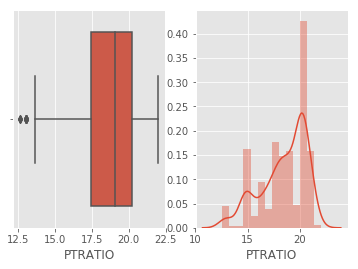

In [84]:
#there is no missing values in it mean and median is almost same , 
#almost perfect distribution of the data 
plt.subplot(121)
sns.boxplot(PT)
plt.subplot(122)
sns.distplot(PT)

#####It has almost best distribution of the data

####Feature: B (propotion of black people is that town)

Number of missing values in this feature is 0
Mean of this feature is 356.67403162055257
Median of this feature is 391.44


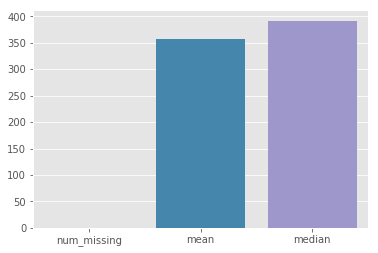

In [87]:
B = df['B']
print('Number of missing values in this feature is {}'.format(B.isnull().sum()))
print('Mean of this feature is {}'.format(B.mean()))
print('Median of this feature is {}'.format(B.median()))
sns.barplot(x=['num_missing', 'mean', 'median'],
           y=[B.isnull().sum(), B.mean(), B.median()])

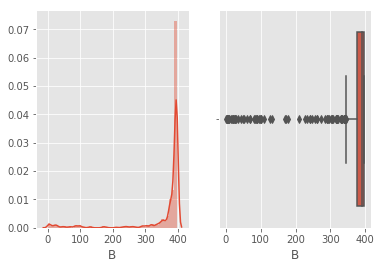

In [88]:
#no missing values 
plt.subplot(121)
sns.distplot(B)
plt.subplot(122)
sns.boxplot(B)

In [89]:
B[:4]

0    396.90
1    396.90
2    392.83
3    394.63
Name: B, dtype: float64

#####Inference is that most of the town has black percentage about 62-64 percent

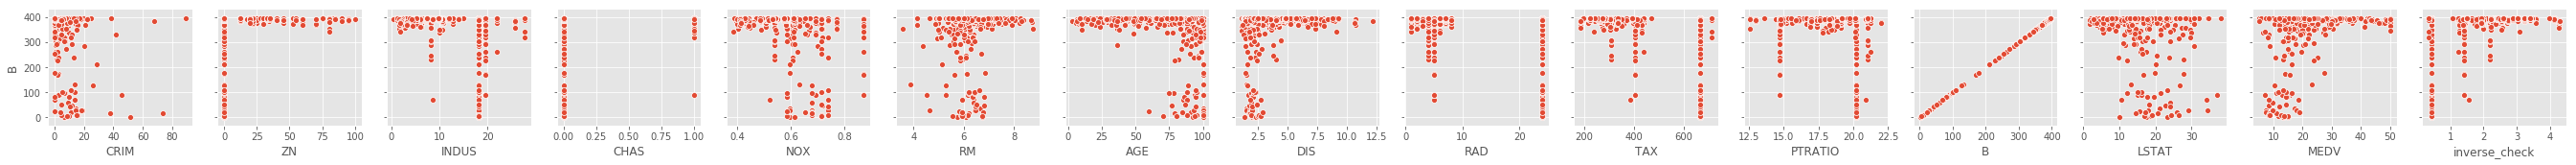

In [90]:
sns.pairplot(df, x_vars=df.columns, y_vars=['B'])

In [0]:
df2['B'] = df['B']

#####Infernce is that there is no corelation between B feature and other features 

####Feature : (LSTAT) (lower status income family)

Number of missing values 20
Mean of this variable is 12.715432098765435
Median of this variable is 11.43


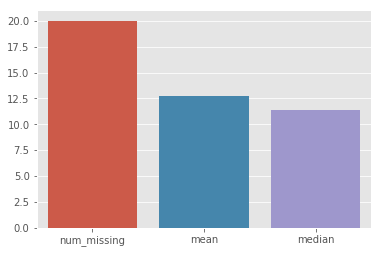

In [94]:
LSTAT = df['LSTAT']
print('Number of missing values {}'.format(LSTAT.isnull().sum()))
print('Mean of this variable is {}'.format(LSTAT.mean()))
print('Median of this variable is {}'.format(LSTAT.median()))
sns.barplot(x=['num_missing', 'mean', 'median'],
           y=[LSTAT.isnull().sum(), LSTAT.mean(), LSTAT.median()])

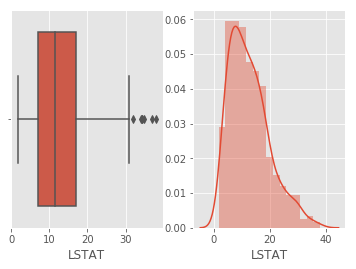

In [99]:
plt.subplot(121)
sns.boxplot(LSTAT)
plt.subplot(122)
sns.distplot(LSTAT.dropna())

In [100]:
LSTAT.std()

7.155870815805249

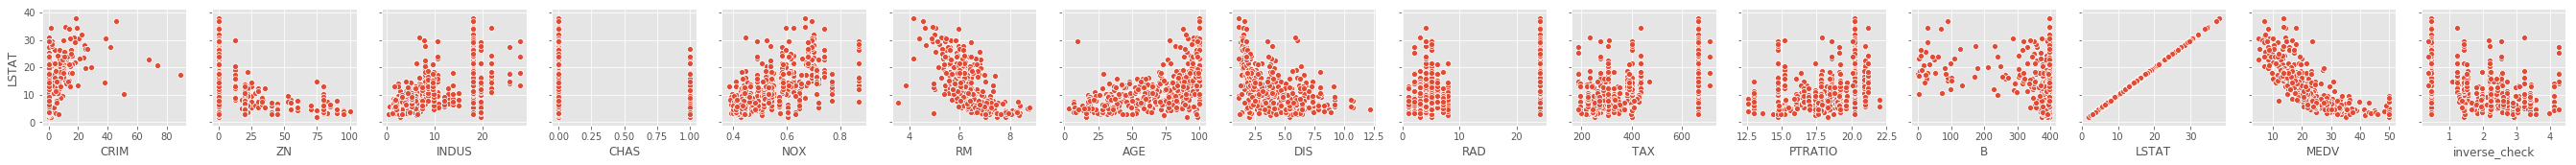

In [101]:
#let us see the corelation between other features 
sns.pairplot(df , x_vars=df.columns , y_vars=['LSTAT'])

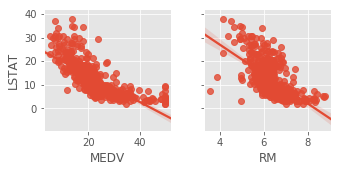

In [103]:
#Let us only see the relation between the LSTAT and MEDV and RM
sns.pairplot(df , x_vars=['MEDV', 'RM'], y_vars=['LSTAT'], kind='reg')

#####Inference is that there is some negative corelation between the LSTAT and (MEDV and RM)

In [106]:
check_df = df[['LSTAT', 'MEDV','RM','PTRATIO']]
check_df.head(10)

,LSTAT,MEDV,RM,PTRATIO
0,4.98,24.0,6.575,15.3
1,9.14,21.6,6.421,17.8
2,4.03,34.7,7.185,17.8
3,2.94,33.4,6.998,18.7
4,NaN,36.2,7.147,18.7
5,5.21,28.7,6.430,18.7
6,12.43,22.9,6.012,15.2
7,19.15,27.1,6.172,15.2
8,29.93,16.5,5.631,15.2
9,17.10,18.9,6.004,15.2


#####we will fillna with mean of that variable 

In [0]:
df2['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

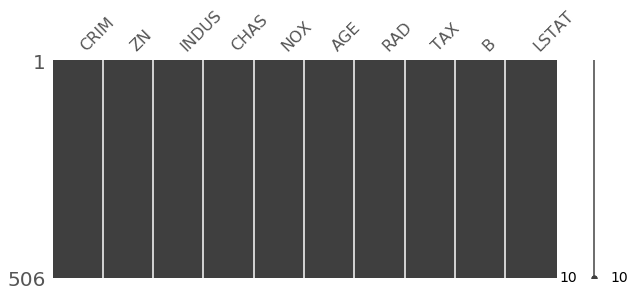

In [109]:
missingno.matrix(df2, figsize=(10,4))

#####Feature (MEDV) (Median value of owner-occupied homes in $1000s )

Number of missing values is 0
mean of this feature is 22.532806324110698
median of this feature is 21.2


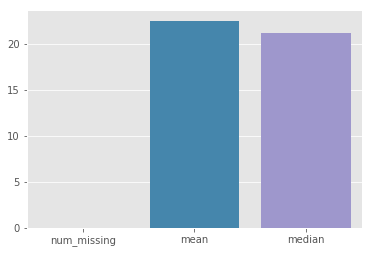

In [110]:
medv = df['MEDV']
print('Number of missing values is {}'.format(medv.isnull().sum()))
print('mean of this feature is {}'.format(medv.mean()))
print('median of this feature is {}'.format(medv.median()))
sns.barplot(x=['num_missing', 'mean', 'median'],
           y=[medv.isnull().sum(), medv.mean(), medv.median()])

#####No missing value and mean and median is almost same (data looks good)

###exploratory data analysis is done